In [4]:
import pandas as pd
import json

In [6]:
with open('../api/devices/phy-Bluetooth.json', 'r') as openfile:
    bt = json.load(openfile)

In [8]:
bt_df = pd.DataFrame()

for device in bt:    
    bt_data = {
        "key": [device['kismet.device.base.key']], 
        "device_name": [device['kismet.device.base.name']],
        "device_type": [device['kismet.device.base.type']],
        "num_packets": [device['kismet.device.base.packets.total']],
        "manuf": [device['kismet.device.base.manuf']], 
        "macaddr": [device['kismet.device.base.macaddr']],
        "channel": [device['kismet.device.base.channel']],
        "first_seen": [device['kismet.device.base.first_time']], 
        "last_seen": [device['kismet.device.base.last_time']],
        "server_uuid": [device['kismet.server.uuid']]
    }
    
    bt_df = pd.concat([bt_df, pd.DataFrame(bt_data)], ignore_index=True)

In [13]:
bt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   key          303 non-null    object
 1   device_name  303 non-null    object
 2   device_type  303 non-null    object
 3   num_packets  303 non-null    int64 
 4   manuf        303 non-null    object
 5   macaddr      303 non-null    object
 6   channel      303 non-null    object
 7   first_seen   303 non-null    int64 
 8   last_seen    303 non-null    int64 
 9   server_uuid  303 non-null    object
dtypes: int64(3), object(7)
memory usage: 23.8+ KB


device_type
BTLE      301
BR/EDR      2
Name: count, dtype: int64


<Axes: xlabel='device_type'>

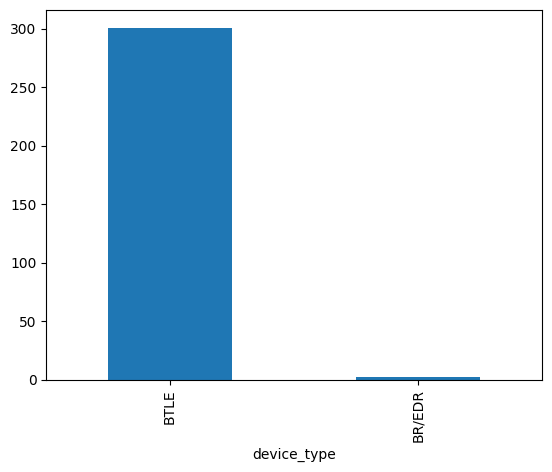

In [11]:
print(bt_df['device_type'].value_counts())
bt_df['device_type'].value_counts().plot(kind='bar')

In [31]:
bt_df[bt_df['device_type']=='BR/EDR']

,key,device_name,device_type,num_packets,manuf,macaddr,channel,first_seen,last_seen,server_uuid
41,B603E01100000000_4271B3EDEB08,Spark 40 Audio,BR/EDR,418,World Elite Technology Ltd,08:EB:ED:B3:71:42,FHSS,1681162583,1681167243,9B95B2B2-CF0F-11ED-A729-4B49534D4554
81,B603E01100000000_84A9CB379300,DESKTOP-VRUJRMT,BR/EDR,2,Intel Corporation,00:93:37:CB:A9:84,FHSS,1681163403,1681163413,9B95B2B2-CF0F-11ED-A729-4B49534D4554


In [50]:
print(bt_df[~bt_df["device_name"].str.contains(':', na=False)]['device_name'].value_counts())

device_name
Hue Light 1                  1
Tabletop                     1
LE-Bose Micro SoundLink      1
Hue Light 2                  1
EOSM50                       1
Forerunner 235               1
 Spark 40 BLE                1
[TV] Samsung TU7000 43 TV    1
Spark 40 Audio               1
DESKTOP-VRUJRMT              1
LE-Bose QC35 II              1
Inspire 2                    1
fenix 5x                     1
Name: count, dtype: int64


In [49]:
bt_df[~bt_df["device_name"].str.contains(':', na=False)]

,key,device_name,device_type,num_packets,manuf,macaddr,channel,first_seen,last_seen,server_uuid
4,B603E01100000000_800B74E8B9D0,Hue Light 1,BTLE,280,Unknown,D0:B9:E8:74:0B:80,FHSS,1681162294,1681167919,9B95B2B2-CF0F-11ED-A729-4B49534D4554
6,B603E01100000000_3162AD51C0CB,Tabletop,BTLE,656,Unknown,CB:C0:51:AD:62:31,FHSS,1681162294,1681167997,9B95B2B2-CF0F-11ED-A729-4B49534D4554
13,B603E01100000000_F550AFA51128,LE-Bose Micro SoundLink,BTLE,626,Bose Corporation,28:11:A5:AF:50:F5,FHSS,1681162295,1681168025,9B95B2B2-CF0F-11ED-A729-4B49534D4554
15,B603E01100000000_A528391020C0,Hue Light 2,BTLE,686,Unknown,C0:20:10:39:28:A5,FHSS,1681162296,1681168025,9B95B2B2-CF0F-11ED-A729-4B49534D4554
16,B603E01100000000_6EA2759ACC4,EOSM50,BTLE,574,Murata Manufacturing Ltd,C4:AC:59:27:EA:06,FHSS,1681162296,1681168027,9B95B2B2-CF0F-11ED-A729-4B49534D4554
17,B603E01100000000_DEC8C15DA9E8,Forerunner 235,BTLE,570,Unknown,E8:A9:5D:C1:C8:DE,FHSS,1681162296,1681168025,9B95B2B2-CF0F-11ED-A729-4B49534D4554
19,B603E01100000000_4271B3EDEBF7,Spark 40 BLE,BTLE,582,Unknown,F7:EB:ED:B3:71:42,FHSS,1681162298,1681167955,9B95B2B2-CF0F-11ED-A729-4B49534D4554
20,B603E01100000000_39DCA6710970,[TV] Samsung TU7000 43 TV,BTLE,525,Samsung Electronics Ltd,70:09:71:A6:DC:39,FHSS,1681162305,1681168015,9B95B2B2-CF0F-11ED-A729-4B49534D4554
41,B603E01100000000_4271B3EDEB08,Spark 40 Audio,BR/EDR,418,World Elite Technology Ltd,08:EB:ED:B3:71:42,FHSS,1681162583,1681167243,9B95B2B2-CF0F-11ED-A729-4B49534D4554
81,B603E01100000000_84A9CB379300,DESKTOP-VRUJRMT,BR/EDR,2,Intel Corporation,00:93:37:CB:A9:84,FHSS,1681163403,1681163413,9B95B2B2-CF0F-11ED-A729-4B49534D4554


In [30]:
print(bt_df['channel'].value_counts())

channel
FHSS    303
Name: count, dtype: int64


manuf
Unknown                               293
Bose Corporation                        2
Murata Manufacturing Ltd                1
Samsung Electronics Ltd                 1
World Elite Technology Ltd              1
Apple                                   1
Intel Corporation                       1
Beijing Xiaomi Mobile Software Ltd      1
Rayson Technology Ltd                   1
Act KDE Inc.                            1
Name: count, dtype: int64


<Axes: ylabel='count'>

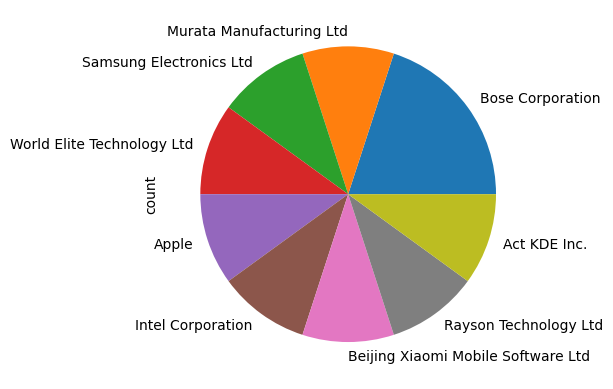

In [40]:
print(bt_df['manuf'].value_counts())
bt_df[~bt_df["manuf"].str.contains('Unknown', na=False)]['manuf'].value_counts().plot(kind='pie')

In [41]:
bt_df[~bt_df["manuf"].str.contains('Unknown', na=False)]

,key,device_name,device_type,num_packets,manuf,macaddr,channel,first_seen,last_seen,server_uuid
13,B603E01100000000_F550AFA51128,LE-Bose Micro SoundLink,BTLE,626,Bose Corporation,28:11:A5:AF:50:F5,FHSS,1681162295,1681168025,9B95B2B2-CF0F-11ED-A729-4B49534D4554
16,B603E01100000000_6EA2759ACC4,EOSM50,BTLE,574,Murata Manufacturing Ltd,C4:AC:59:27:EA:06,FHSS,1681162296,1681168027,9B95B2B2-CF0F-11ED-A729-4B49534D4554
20,B603E01100000000_39DCA6710970,[TV] Samsung TU7000 43 TV,BTLE,525,Samsung Electronics Ltd,70:09:71:A6:DC:39,FHSS,1681162305,1681168015,9B95B2B2-CF0F-11ED-A729-4B49534D4554
41,B603E01100000000_4271B3EDEB08,Spark 40 Audio,BR/EDR,418,World Elite Technology Ltd,08:EB:ED:B3:71:42,FHSS,1681162583,1681167243,9B95B2B2-CF0F-11ED-A729-4B49534D4554
70,B603E01100000000_56E767BCF808,08:F8:BC:67:E7:56,BTLE,3,Apple,08:F8:BC:67:E7:56,FHSS,1681163009,1681163933,9B95B2B2-CF0F-11ED-A729-4B49534D4554
81,B603E01100000000_84A9CB379300,DESKTOP-VRUJRMT,BR/EDR,2,Intel Corporation,00:93:37:CB:A9:84,FHSS,1681163403,1681163413,9B95B2B2-CF0F-11ED-A729-4B49534D4554
91,B603E01100000000_B9804CA1412C,LE-Bose QC35 II,BTLE,1,Bose Corporation,2C:41:A1:4C:80:B9,FHSS,1681163795,1681163795,9B95B2B2-CF0F-11ED-A729-4B49534D4554
222,B603E01100000000_1C17EB57CD3C,3C:CD:57:EB:17:1C,BTLE,7,Beijing Xiaomi Mobile Software Ltd,3C:CD:57:EB:17:1C,FHSS,1681166861,1681167744,9B95B2B2-CF0F-11ED-A729-4B49534D4554
231,B603E01100000000_8EC59AE5B754,54:B7:E5:9A:C5:8E,BTLE,1,Rayson Technology Ltd,54:B7:E5:9A:C5:8E,FHSS,1681167049,1681167049,9B95B2B2-CF0F-11ED-A729-4B49534D4554
237,B603E01100000000_87A787D9B868,68:B8:D9:87:A7:87,BTLE,1,Act KDE Inc.,68:B8:D9:87:A7:87,FHSS,1681167101,1681167101,9B95B2B2-CF0F-11ED-A729-4B49534D4554


<Axes: >

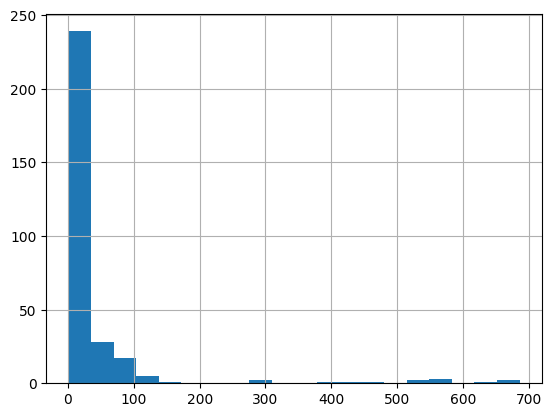

In [44]:
bt_df['num_packets'].hist(bins=20)

<Axes: >

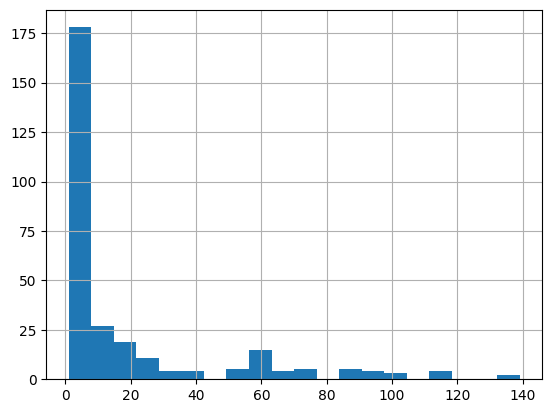

In [45]:
bt_df[bt_df['num_packets']<200]['num_packets'].hist(bins=20)

In [46]:
bt_df[bt_df['num_packets']>200]

,key,device_name,device_type,num_packets,manuf,macaddr,channel,first_seen,last_seen,server_uuid
4,B603E01100000000_800B74E8B9D0,Hue Light 1,BTLE,280,Unknown,D0:B9:E8:74:0B:80,FHSS,1681162294,1681167919,9B95B2B2-CF0F-11ED-A729-4B49534D4554
6,B603E01100000000_3162AD51C0CB,Tabletop,BTLE,656,Unknown,CB:C0:51:AD:62:31,FHSS,1681162294,1681167997,9B95B2B2-CF0F-11ED-A729-4B49534D4554
9,B603E01100000000_3B9724759EE8,E8:9E:75:24:97:3B,BTLE,544,Unknown,E8:9E:75:24:97:3B,FHSS,1681162294,1681168027,9B95B2B2-CF0F-11ED-A729-4B49534D4554
10,B603E01100000000_DE0C6D4CCD05,05:CD:4C:6D:0C:DE,BTLE,294,Unknown,05:CD:4C:6D:0C:DE,FHSS,1681162295,1681165810,9B95B2B2-CF0F-11ED-A729-4B49534D4554
11,B603E01100000000_404C94F0C3E6,E6:C3:F0:94:4C:40,BTLE,466,Unknown,E6:C3:F0:94:4C:40,FHSS,1681162295,1681168027,9B95B2B2-CF0F-11ED-A729-4B49534D4554
13,B603E01100000000_F550AFA51128,LE-Bose Micro SoundLink,BTLE,626,Bose Corporation,28:11:A5:AF:50:F5,FHSS,1681162295,1681168025,9B95B2B2-CF0F-11ED-A729-4B49534D4554
15,B603E01100000000_A528391020C0,Hue Light 2,BTLE,686,Unknown,C0:20:10:39:28:A5,FHSS,1681162296,1681168025,9B95B2B2-CF0F-11ED-A729-4B49534D4554
16,B603E01100000000_6EA2759ACC4,EOSM50,BTLE,574,Murata Manufacturing Ltd,C4:AC:59:27:EA:06,FHSS,1681162296,1681168027,9B95B2B2-CF0F-11ED-A729-4B49534D4554
17,B603E01100000000_DEC8C15DA9E8,Forerunner 235,BTLE,570,Unknown,E8:A9:5D:C1:C8:DE,FHSS,1681162296,1681168025,9B95B2B2-CF0F-11ED-A729-4B49534D4554
19,B603E01100000000_4271B3EDEBF7,Spark 40 BLE,BTLE,582,Unknown,F7:EB:ED:B3:71:42,FHSS,1681162298,1681167955,9B95B2B2-CF0F-11ED-A729-4B49534D4554


In [56]:
time_data = bt_df.copy()
diff = time_data['last_seen'] - time_data['first_seen']
hours = diff / 3600
time_data['time_between (hours)'] = hours

<Axes: xlabel='time_between (hours)', ylabel='num_packets'>

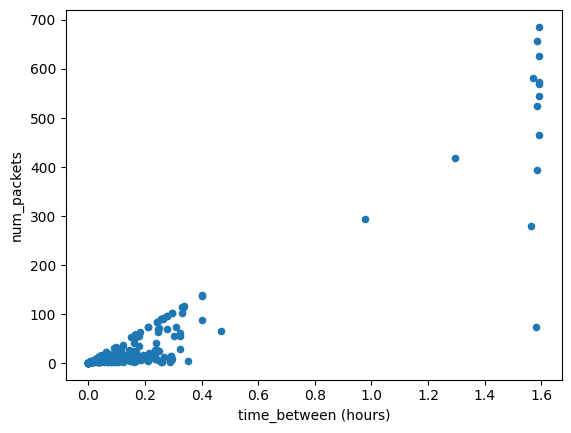

In [52]:
time_data.plot.scatter('time_between (hours)', 'num_packets')

<Axes: xlabel='time_between (hours)', ylabel='num_packets'>

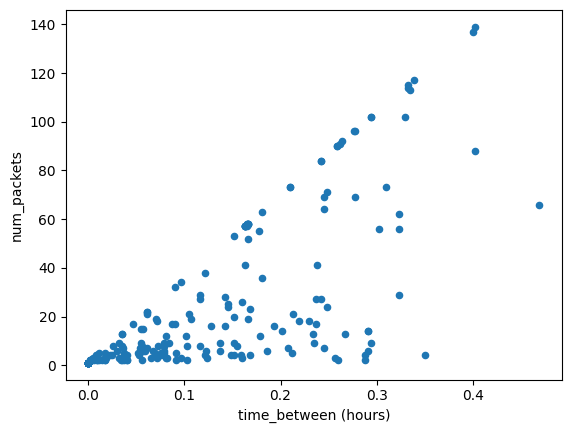

In [55]:
time_data[time_data['time_between (hours)']<0.6].plot.scatter('time_between (hours)', 'num_packets')

In [58]:
time_data[time_data['time_between (hours)']>0.8]

,key,device_name,device_type,num_packets,manuf,macaddr,channel,first_seen,last_seen,server_uuid,time_between (hours)
4,B603E01100000000_800B74E8B9D0,Hue Light 1,BTLE,280,Unknown,D0:B9:E8:74:0B:80,FHSS,1681162294,1681167919,9B95B2B2-CF0F-11ED-A729-4B49534D4554,1.562500
6,B603E01100000000_3162AD51C0CB,Tabletop,BTLE,656,Unknown,CB:C0:51:AD:62:31,FHSS,1681162294,1681167997,9B95B2B2-CF0F-11ED-A729-4B49534D4554,1.584167
9,B603E01100000000_3B9724759EE8,E8:9E:75:24:97:3B,BTLE,544,Unknown,E8:9E:75:24:97:3B,FHSS,1681162294,1681168027,9B95B2B2-CF0F-11ED-A729-4B49534D4554,1.592500
10,B603E01100000000_DE0C6D4CCD05,05:CD:4C:6D:0C:DE,BTLE,294,Unknown,05:CD:4C:6D:0C:DE,FHSS,1681162295,1681165810,9B95B2B2-CF0F-11ED-A729-4B49534D4554,0.976389
11,B603E01100000000_404C94F0C3E6,E6:C3:F0:94:4C:40,BTLE,466,Unknown,E6:C3:F0:94:4C:40,FHSS,1681162295,1681168027,9B95B2B2-CF0F-11ED-A729-4B49534D4554,1.592222
13,B603E01100000000_F550AFA51128,LE-Bose Micro SoundLink,BTLE,626,Bose Corporation,28:11:A5:AF:50:F5,FHSS,1681162295,1681168025,9B95B2B2-CF0F-11ED-A729-4B49534D4554,1.591667
15,B603E01100000000_A528391020C0,Hue Light 2,BTLE,686,Unknown,C0:20:10:39:28:A5,FHSS,1681162296,1681168025,9B95B2B2-CF0F-11ED-A729-4B49534D4554,1.591389
16,B603E01100000000_6EA2759ACC4,EOSM50,BTLE,574,Murata Manufacturing Ltd,C4:AC:59:27:EA:06,FHSS,1681162296,1681168027,9B95B2B2-CF0F-11ED-A729-4B49534D4554,1.591944
17,B603E01100000000_DEC8C15DA9E8,Forerunner 235,BTLE,570,Unknown,E8:A9:5D:C1:C8:DE,FHSS,1681162296,1681168025,9B95B2B2-CF0F-11ED-A729-4B49534D4554,1.591389
19,B603E01100000000_4271B3EDEBF7,Spark 40 BLE,BTLE,582,Unknown,F7:EB:ED:B3:71:42,FHSS,1681162298,1681167955,9B95B2B2-CF0F-11ED-A729-4B49534D4554,1.571389
